# Exploratory Data Analysis

## Prerequisite Imports
Import the necessary libraries. **_numpy_** library provides numerical computing tools for python. The **_pandas_** library provides data analysis tools and data structures for data wrangling and munging. **_statsmodels_** provides various statistical tools, and **_matplotlib_** and **_seaborn_** libraries both provide plotting tools.

In [1]:
# Required Imports
import numpy as np
import pandas as pd
from pandas.plotting import autocorrelation_plot as acfplot
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.tsa.api as smt
import statsmodels.api as sm
import statsmodels.tsa.stattools as statstools

import scipy.stats as scs

# For ensuring date and numeric values in data frames.
from locale import atof
import datetime as dt

import warnings
warnings.simplefilter('ignore')

%matplotlib inline

/home/dna/PycharmProjects/predictive-ts-analysis/venv/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Below we define a method for plotting time series data. The method is used to plot the time series, autocorrelation (ACF), partial autocorrelation (PACF), QQ and probability plots (normal). Additionally, we get the kernel density plot and the ACF plot with 95% and 99% confidence intervals. 

In [138]:
# Commonly used methods

def plot_acfs(y, lags=None, style='seaborn-whitegrid', filename='/tmp/file.png'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        layout = (2, 4)
        
        plt.figure(figsize=(20, 12))
        # Plot the Time Series
        ax1 = plt.subplot2grid(layout, (0,0), colspan=2)
        ax1.autoscale(enable=True, axis='x', tight=True)
        ax1.set_title('Time Series Analysis Plots')
        y.plot(ax=ax1)
        plt.savefig('/tmp/ts-01.png', dpi=300, bbox_inches='tight')
        
        # Plot the Correlogram (ACF)
        ax2 = plt.subplot2grid(layout, (0, 2))
        ax2.autoscale(enable=True, axis='x', tight=True)
        extent = ax2.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
        smt.graphics.plot_acf(y, ax=ax2, lags=lags, alpha=0.05)
        plt.savefig('/tmp/ts-02.png', dpi=300, bbox_inches=extent.expanded(1.2, 1.2))
        
        # Plot the Correlogram (PACF)
        ax3 = plt.subplot2grid(layout, (0, 3))
        ax3.autoscale(enable=True, axis='x', tight=True)
        smt.graphics.plot_pacf(y, ax=ax3, lags=lags, alpha=0.05)
        extent = ax3.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
        plt.savefig('/tmp/ts-03.png', dpi=300, bbox_inches=extent.expanded(1.2, 1.2))
                
        # QQ Plot
        ax4 = plt.subplot2grid(layout, (1, 0))
        ax4.autoscale(enable=True, axis='x', tight=True)
        extent = ax4.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
        sm.qqplot(y, line='s', ax=ax4)
        ax4.set_title('QQ Plot')
        plt.savefig('/tmp/ts-04.png', dpi=300, bbox_inches=extent.expanded(1.4, 1.2))
        
        # Probability Plot
        ax5 = plt.subplot2grid(layout, (1, 1))
        ax5.autoscale(enable=True, axis='x', tight=True)
        extent = ax5.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
        scs.probplot(y, sparams=(y.mean(), y.std()), plot=ax5)
        plt.savefig('/tmp/ts-05.png', dpi=300, bbox_inches=extent.expanded(1.4, 1.2))
        
        # Distribution Histogram
        ax6 = plt.subplot2grid(layout, (1,2))
        ax6.autoscale(enable=True, axis='x', tight=True)
        extent = ax6.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
        sns.distplot(y, ax=ax6)
        plt.savefig('/tmp/ts-06.png', dpi=300, bbox_inches=extent.expanded(1.4, 1.2))
        
        # ACF line plot with CIs
        ax7 = plt.subplot2grid(layout,(1,3))
        ax7.autoscale(enable=True, axis='x', tight=True)
        extent = ax7.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
        acfplot(y, ax=ax7)
        ax6.set_title('ACF Plot')
        plt.savefig('/tmp/ts-07.png', dpi=300, bbox_inches=extent.expanded(1.4, 1.2))
        
        plt.savefig(filename, dpi=300, bbox_inches='tight')

def plot_acfs_resids1(y, lags=None, style='seaborn-whitegrid', filename='/tmp/resids.png'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        layout = (2, 1)
        
        plt.figure(figsize=(6, 5))        
        # Plot the Correlogram (ACF)
        ax1 = plt.subplot2grid(layout, (0, 0))
        smt.graphics.plot_acf(y, ax=ax1, lags=lags, alpha=0.05)
        
        # Plot the Correlogram (PACF)
        ax2 = plt.subplot2grid(layout, (1, 0))
        smt.graphics.plot_pacf(y, ax=ax2, lags=lags, alpha=0.05)

def plot_acfs_resids2(y, lags=None, style='seaborn-whitegrid', filename='/tmp/resids.png'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        layout = (1, 1)
        
        plt.figure(figsize=(6, 5))
        # QQ Plot
        ax3 = plt.subplot2grid(layout, (0, 0), rowspan=2)
        sm.qqplot(y, line='s', ax=ax3)
        ax3.set_title('QQ Plot')

def plot_acfs_resids3(y, lags=None, style='seaborn-whitegrid', filename='/tmp/resids.png'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        layout = (1, 1)
        
        plt.figure(figsize=(6, 5))
        # Probability Plot
        ax4 = plt.subplot2grid(layout, (0, 0), rowspan=2)
        scs.probplot(y, sparams=(y.mean(), y.std()), plot=ax4)

def plot_acfs_resids4(y, lags=None, style='seaborn-whitegrid', filename='/tmp/resids.png'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        layout = (1, 1)
        
        plt.figure(figsize=(6, 5))
        # Distribution Histogram
        ax5 = plt.subplot2grid(layout, (0, 0), rowspan=2)
        sns.distplot(y, ax=ax5)
        

## Data Preparation
Create a _pandas_ dataframe to hold the imported data.

In [43]:
raw_data_long = pd.read_csv("/home/dna/PycharmProjects/predictive-ts-analysis/data/ds2-6months-hourly.csv")
data_long = raw_data_long.pivot(index='Timeline', columns='filters', values='Count')
data_long = data_long.applymap(lambda x: float(x.split()[0].replace(',', '')))
data_long = data_long.set_index(pd.DatetimeIndex(data_long.index))

raw_data = pd.read_csv("/home/dna/PycharmProjects/predictive-ts-analysis/data/ds1-hourly.csv")
data = raw_data.pivot(index='Timeline', columns='filters', values='Count')
# data = data.applymap(lambda x: float(x.split()[0].replace(',', '')))
data = data.set_index(pd.DatetimeIndex(data.index))
print("Dataframe dimensions: {}".format(data.shape))

#data_long.head()
data.head()

Dataframe dimensions: (192, 6)


filters,CMSPool,CMSProd,LCGAdmin,LIGO,Others,PhEDEx
Timeline,,,,,,
2017-03-09 10:00:00,746,783,48,0,0,278
2017-03-09 11:00:00,4008,4923,264,8,0,1233
2017-03-09 12:00:00,4979,6437,274,8,0,1688
2017-03-09 13:00:00,9404,6174,296,8,0,1248
2017-03-09 14:00:00,8585,5312,279,4,0,1577


# Analysis
## Detecting Stationarity

### Short GridFTP Dataset (8-Days)

In [4]:
# Extract CMS Production traffic connections for analysis.
cmsprodSeries = data['CMSProd']

In [5]:
adf_result = statstools.adfuller(cmsprodSeries, autolag='AIC')
print('p-val of the dataset (GridFTP, hourly, 8 Days):', adf_result[1])
# High p-value (>0.05) indicates non-stationary series and low p-values indicate stationary series.

p-val of the dataset (GridFTP, hourly, 8 Days): 0.11674850015917482


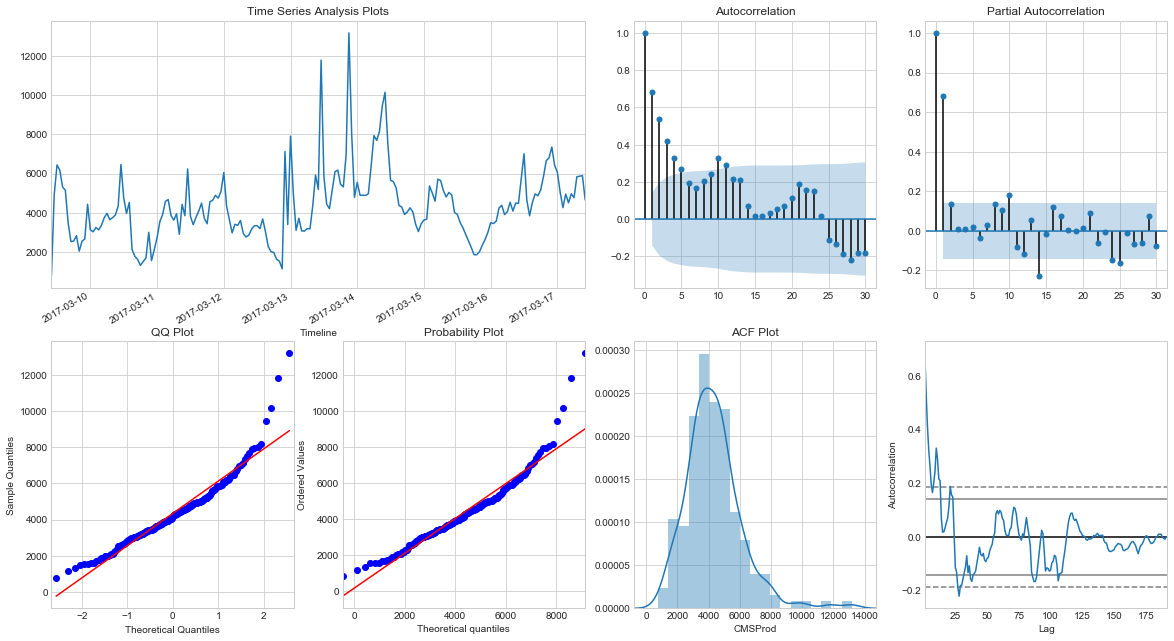

In [139]:
plot_acfs(cmsprodSeries, lags=30)

### Long GridFTP Dataset (6+ months)

In [7]:
# Extract CMS Production traffic connections for analysis.
cmsprodSeries_long = data_long['CMSProd']
adf_result_long = statstools.adfuller(cmsprodSeries_long, autolag='AIC')
print('p-val of the dataset (GridFTP, hourly, 6+ Months):', adf_result_long[1])
# High p-value indicates non-stationary series and low p-values indicate stationary series.

p-val of the dataset (GridFTP, hourly, 6+ Months): 1.7386532913100715e-07


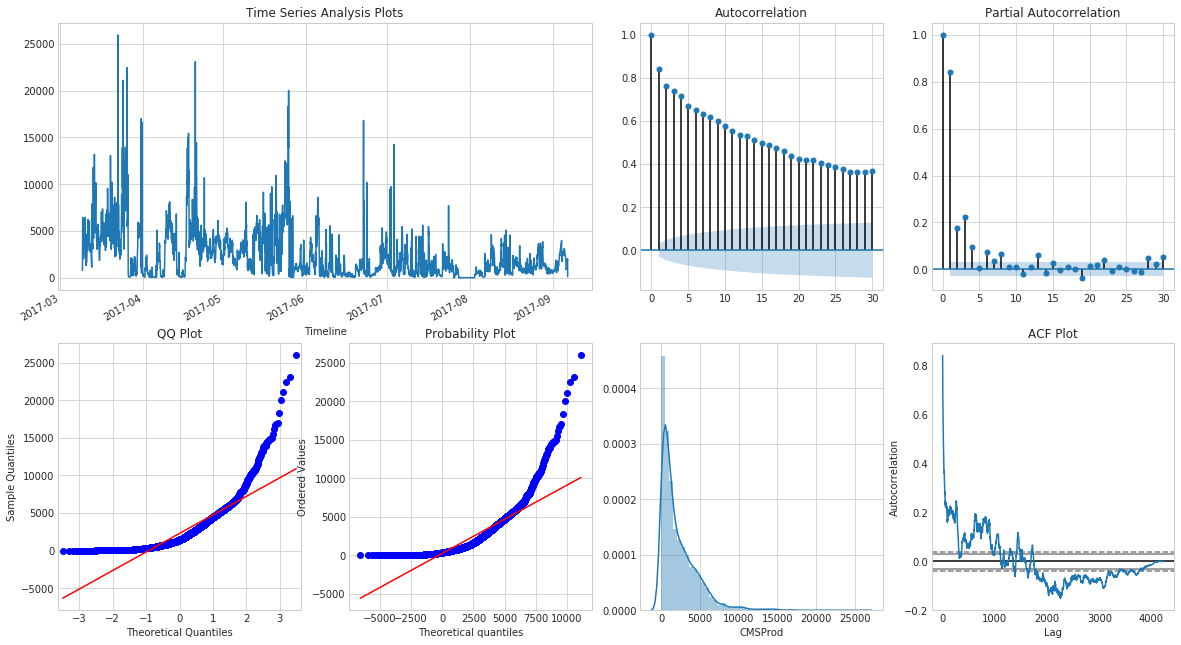

In [8]:
plot_acfs(cmsprodSeries_long, lags=30)

## Time Series Decomposition
### Short GridFTP Dataset (8-Days)

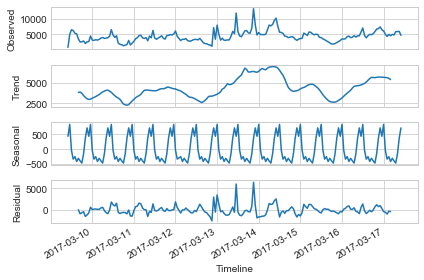

In [9]:
data_decomposed_additive = smt.seasonal_decompose(cmsprodSeries, model='additive', freq=12)
plt.style.use('seaborn-whitegrid')
dc_plot_add = data_decomposed_additive.plot()

plt.savefig('/tmp/ts_decomp_short.png', dpi=300, bbox_inches='tight')

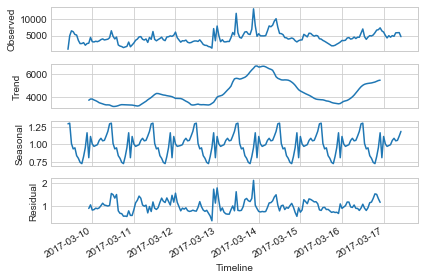

In [10]:
data_decomposed_mul = smt.seasonal_decompose(cmsprodSeries, model='multiplicative', freq=24)
dc_plot_mul = data_decomposed_mul.plot()

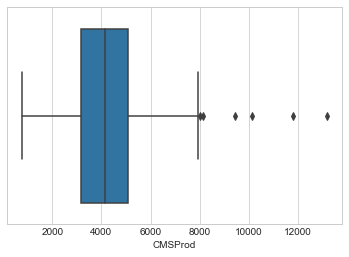

In [11]:
plt.style.use('seaborn-whitegrid')
bp = sns.boxplot(cmsprodSeries)
plt.savefig('/tmp/box_short.png', dpi=300, bbox_inches='tight')

### Long GridFTP Dataset (6+ months)

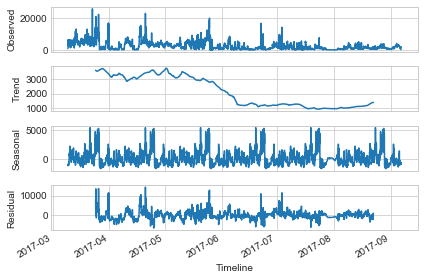

In [12]:
long_data_decomposed_additive = smt.seasonal_decompose(cmsprodSeries_long, model='additive', freq=720)
plt.style.use('seaborn-whitegrid')
long_dc_plot_add = long_data_decomposed_additive.plot()
plt.savefig('/tmp/ts_decomp_long.png', dpi=300, bbox_inches='tight')

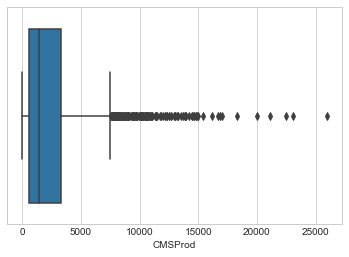

In [13]:
plt.style.use('seaborn-whitegrid')
bp_long = sns.boxplot(cmsprodSeries_long)
plt.savefig('/tmp/box_long.png', dpi=300, bbox_inches='tight')

### Post-Differencing

In [14]:
#Run ADF test on the irregular variations
adf_result_decomposed = statstools.adfuller(data_decomposed_mul.resid[np.where(np.isfinite(data_decomposed_mul.resid))[0]], autolag='AIC')
print('p-val of the DECOMPOSED dataset (GridFTP, hourly, 8 Days):', adf_result_decomposed[1])

p-val of the DECOMPOSED dataset (GridFTP, hourly, 8 Days): 0.00026288437949677733


In [15]:
#Run ADF test on the irregular variations
adf_result_decomposed_long = statstools.adfuller(long_data_decomposed_additive.resid[np.where(np.isfinite(long_data_decomposed_additive.resid))[0]], autolag='AIC')
print('p-val of the dataset (GridFTP, hourly, 6+ Months):', adf_result_decomposed_long[1])

p-val of the dataset (GridFTP, hourly, 6+ Months): 1.8902560474744084e-11


# Auto-regressive Models

## Fitting AR(p) for the GridFTP Series

In [16]:
max_lag = 10

mdl = smt.AR(np.diff(cmsprodSeries)).fit(maxlag=max_lag, ic='aic', trend='nc')
est_order = smt.AR(np.diff(cmsprodSeries)).select_order(maxlag=max_lag,ic='aic', trend='nc')

print('\ncoef estimate: {:3.4f} {:3.4f} | best lag order = {}'
      .format(mdl.params[0],mdl.params[1], est_order))


coef estimate: -0.4262 -0.2593 | best lag order = 9


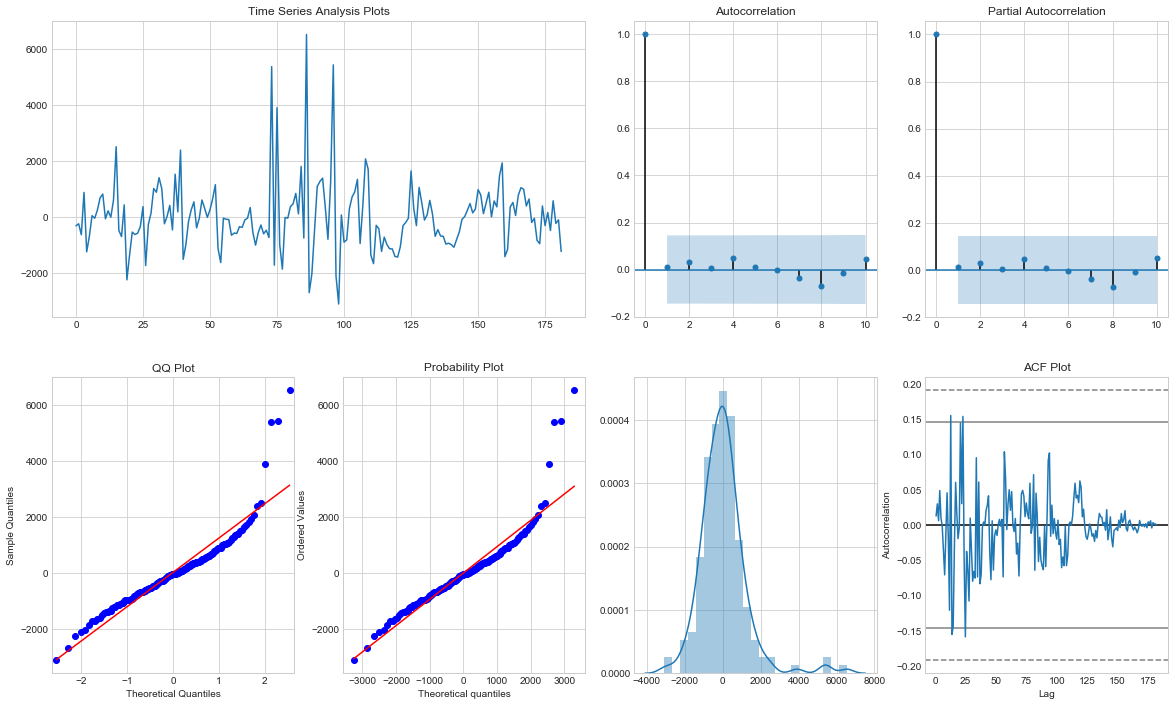

In [17]:
plot_acfs(mdl.resid, lags=max_lag)

## Fitting MA(q) for the GridFTP Series

In [18]:
max_lag = 30
mdl = smt.ARMA(cmsprodSeries, order=(0, 3)).fit(maxlag=max_lag, method='mle', trend='nc')
print(mdl.summary())

                              ARMA Model Results                              
Dep. Variable:                CMSProd   No. Observations:                  192
Model:                     ARMA(0, 3)   Log Likelihood               -1724.971
Method:                           mle   S.D. of innovations           1919.778
Date:                Mon, 18 Jun 2018   AIC                           3457.942
Time:                        12:34:23   BIC                           3470.972
Sample:                    03-09-2017   HQIC                          3463.220
                         - 03-17-2017                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
ma.L1.CMSProd     0.9898      0.059     16.659      0.000       0.873       1.106
ma.L2.CMSProd     0.9113      0.055     16.465      0.000       0.803       1.020
ma.L3.CMSProd     0.5737      0.061     

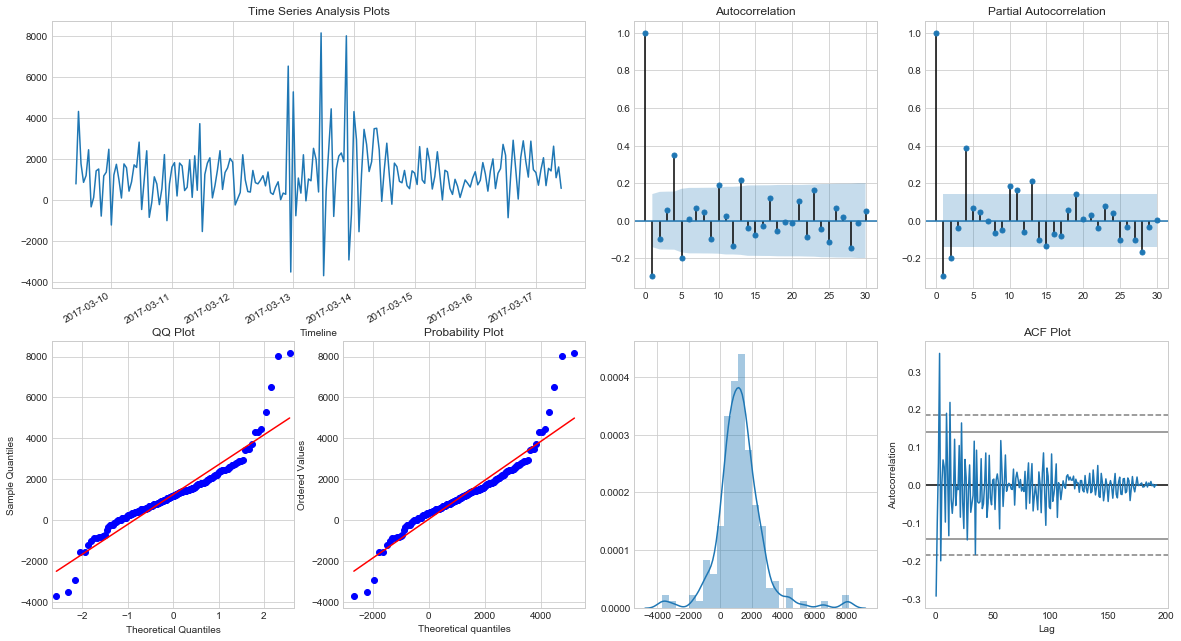

In [19]:
plot_acfs(mdl.resid, lags=max_lag)

## ARMA(p, q) model fit for GridFTP Series

In [20]:
# pick best order by aic 
# smallest aic value wins
max_lag = 30
best_aic = np.inf 
best_order = None
best_mdl = None

rng = range(6)
for i in rng:
    for j in rng:
        try:
            tmp_mdl = smt.ARMA(cmsprodSeries, order=(i, j)).fit(method='mle', trend='nc')
            tmp_aic = tmp_mdl.aic
            if tmp_aic < best_aic:
                best_aic = tmp_aic
                best_order = (i, j)
                best_mdl = tmp_mdl
        except: continue

print('AIC: {:6.5f} | Best Order: {}'.format(best_aic, best_order))

AIC: 3305.68098 | Best Order: (4, 3)


In [21]:
print(best_mdl.summary())

                              ARMA Model Results                              
Dep. Variable:                CMSProd   No. Observations:                  192
Model:                     ARMA(4, 3)   Log Likelihood               -1644.840
Method:                           mle   S.D. of innovations           1257.610
Date:                Mon, 18 Jun 2018   AIC                           3305.681
Time:                        12:34:35   BIC                           3331.741
Sample:                    03-09-2017   HQIC                          3316.235
                         - 03-17-2017                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
ar.L1.CMSProd     0.2633        nan        nan        nan         nan         nan
ar.L2.CMSProd     0.7776      0.043     18.168      0.000       0.694       0.861
ar.L3.CMSProd     0.6253      0.025     

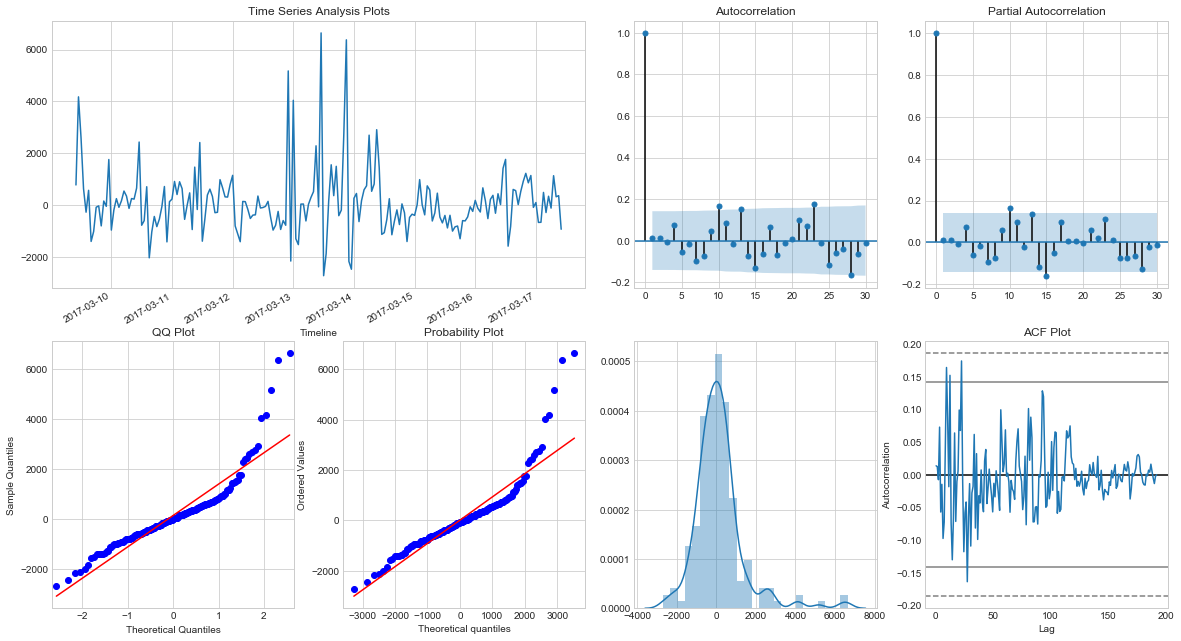

In [22]:
plot_acfs(best_mdl.resid, lags=max_lag)

# Autoregressive Integrated Moving Average Models - ARIMA(p, d, q)

## ARIMA(p, q) model fit for GridFTP Series

In [23]:
# Fit ARIMA(p, d, q) model to the GridFTP series
# pick best order and final model based on aic
max_lag = 30

best_aic_arima = np.inf 
best_order_arima = None
best_mdl_arima = None

pq_rng = range(10) # [0,1,2,3,4]
d_rng = range(2) # [0,1]
for i in pq_rng:
    for d in d_rng:
        for j in pq_rng:
            try:
                tmp_mdl = smt.ARIMA(cmsprodSeries, order=(i,d,j)).fit(method='mle', trend='nc')
                tmp_aic = tmp_mdl.aic
                if tmp_aic < best_aic_arima:
                    best_aic_arima = tmp_aic
                    best_order_arima = (i, d, j)
                    best_mdl_arima = tmp_mdl
            except: continue


print('AIC: {:6.5f} | Order: {}'.format(best_aic_arima, best_order_arima))

AIC: 3281.80302 | Order: (5, 1, 5)


In [24]:
print(best_mdl_arima.summary())

                             ARIMA Model Results                              
Dep. Variable:              D.CMSProd   No. Observations:                  191
Model:                 ARIMA(5, 1, 5)   Log Likelihood               -1629.902
Method:                           mle   S.D. of innovations           1215.041
Date:                Mon, 18 Jun 2018   AIC                           3281.803
Time:                        12:38:37   BIC                           3317.578
Sample:                    03-09-2017   HQIC                          3296.294
                         - 03-17-2017                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
ar.L1.D.CMSProd     0.2381        nan        nan        nan         nan         nan
ar.L2.D.CMSProd    -0.0889        nan        nan        nan         nan         nan
ar.L3.D.CMSProd     0.0120      

## Forecast the GridFTP Series using ARIMA(p,d,q)

In [113]:
# Create a 10 hour forecast of GridFTP CMSProd connections with 95%, 99% CIs
n_steps = 20

f, err95, ci95 = best_mdl_arima.forecast(steps=n_steps) # 95% CI
_, err99, ci99 = best_mdl_arima.forecast(steps=n_steps, alpha=0.01) # 99% CI

idx = pd.date_range(data.index[-1], periods=n_steps, freq='H')
fc_95 = pd.DataFrame(np.column_stack([f, ci95]), 
                     index=idx, columns=['Forecast', 'CI 95% (lower)', 'CI 95% (upper)'])
fc_99 = pd.DataFrame(np.column_stack([ci99]), 
                     index=idx, columns=['CI 99% (lower)', 'CI 99% (upper)'])
fc_all = fc_95.combine_first(fc_99)
# fc_all.index = fc_all.index.map(lambda t: t.strftime('%Y-%m-%d %H:%M'))
fc_all.index.name = 'Timeline'
fc_all.head()

,CI 95% (lower),CI 95% (upper),CI 99% (lower),CI 99% (upper),Forecast
Timeline,,,,,
2017-03-17 10:00:00,2470.297751,7233.170345,1721.996233,7981.471863,4851.734048
2017-03-17 11:00:00,1845.156463,7366.861449,977.633736,8234.384177,4606.008956
2017-03-17 12:00:00,1244.990534,7230.638839,304.577029,8171.052344,4237.814686
2017-03-17 13:00:00,1076.796268,7469.547485,72.422260,8473.921494,4273.171877
2017-03-17 14:00:00,1145.731412,7876.097923,88.314196,8933.515138,4510.914667


In [114]:
# Prediction Error (Actual is 4333)
predicted = fc_all['Forecast'][1]
print(predicted)
actual = 4655
error_percent = abs(predicted - actual)/actual*100.0
print("Absolute Percentage Error (APE): {}%".format(error_percent))

4606.0089564158825
Absolute Percentage Error (APE): 1.0524391747393664%


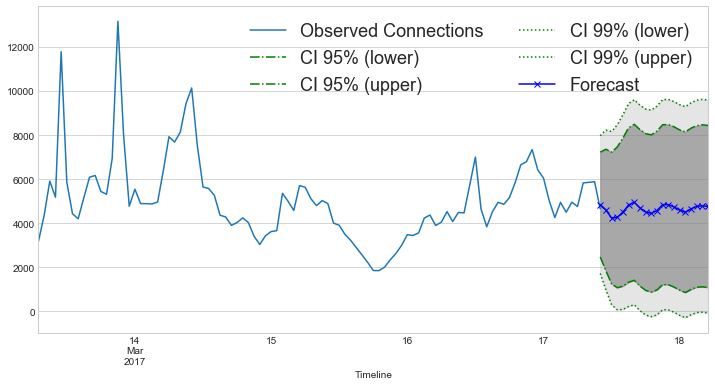

In [115]:
fig = plt.figure(figsize=(12,6))
ax = plt.gca()
ax.autoscale(enable=True, axis='x', tight=True)

# ts = best_mdl.resid.iloc[-500:].copy()
ts = cmsprodSeries.iloc[-100:].copy()
ts.plot(ax=ax, label='Observed Connections')

# in sample prediction
#pred = best_mdl_arima.predict(ts.index[0], ts.index[-1])
#pred.plot(ax=ax, style='r-', label='In-sample prediction')

styles = ['g-.', 'g-.', 'g:', 'g:', 'b-x']
fc_all.plot(ax=ax, style=styles)
plt.fill_between(fc_all.index, fc_all['CI 95% (lower)'], fc_all['CI 95% (upper)'], color='gray', alpha=0.6)
plt.fill_between(fc_all.index, fc_all['CI 99% (lower)'], fc_all['CI 99% (upper)'], color='gray', alpha=0.2)
# plt.title('{} minute GridFTP CMSProd Forecast\nARIMA{}'.format(n_steps, best_order))
plt.legend(loc=1, fontsize=18, ncol=2)

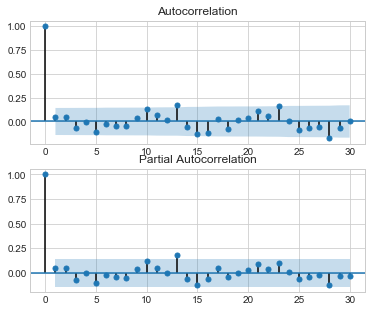

In [116]:
plot_acfs_resids1(best_mdl_arima.resid, lags=max_lag)

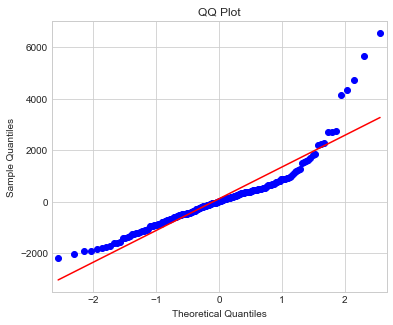

In [117]:
plot_acfs_resids2(best_mdl_arima.resid, lags=max_lag)

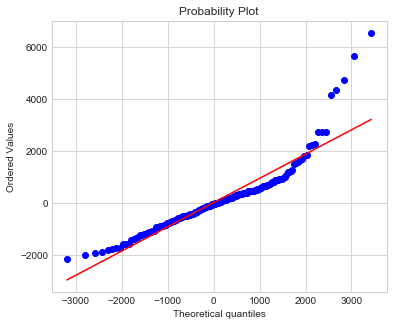

In [118]:
plot_acfs_resids3(best_mdl_arima.resid, lags=max_lag)

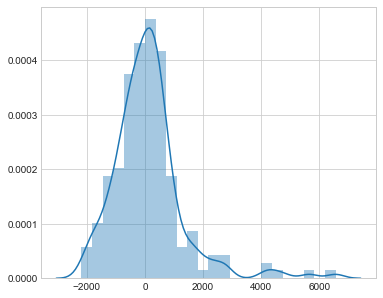

In [119]:
plot_acfs_resids4(best_mdl_arima.resid, lags=max_lag)

In [120]:
def mape(y, yhat):
    return abs(np.subtract(y, yhat)).divide(y).mean()*100

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [123]:
predicted = fc_all['Forecast']

mask = (data_long.index > '2017-03-17 9:00:00') & (data_long.index <= '2017-03-18 05:00:00')
actual = data_long.loc[mask]

mape(predicted, actual['CMSProd'])

16.18339056786188

In [124]:
mean_absolute_percentage_error(predicted, actual['CMSProd'])

16.18339056786188

In [112]:
from scipy import stats
stats.normaltest(best_mdl_arima.resid)



NormaltestResult(statistic=92.84281192820455, pvalue=6.909387462513182e-21)